**Vanilla LSTM First Trial**

A Vanilla LSTM is an LSTM model that has a single hidden layer of LSTM units, and an output layer to make a prediction. We use a Basic LSTM with Spatial Dropout in this experiment.

In [ ]:
'''
This file contains the trial for the very first model run - Vanilla LSTM - without Hyperparameter Tuning.
For best results, run the corresponding Python file.
The outputs have been presented and discussed in the report.
'''
#Importing necessary libraries
import nltk
import pandas as pd
from nltk.corpus import stopwords
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import tensorflow as tf
import numpy as np
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
tweetData = pd.read_csv('/content/drive/MyDrive/NNDL-Group-project/data/Feature-Engineered.csv', index_col=False)
tweetData

,Unnamed: 0,tweet_id,tweet,tweettype,charCount,wordCount,sentenceCount,capCharCount,capWordCount,quotedWordCount,...,\ count,] count,^ count,_ count,` count,{ count,| count,} count,~ count,lemmatizedText
0,0,0,@ZubairSabirPTI pls dont insult the word 'Molna',anger,49,7,1,6,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pls dont insult word
1,1,1,@ArcticFantasy I would have almost took offens...,anger,81,14,1,4,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,would almost take offense actually snap
2,2,2,@IllinoisLoyalty that Rutgers game was an abom...,anger,114,20,3,6,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,rutgers game abomination affront god man must ...
3,3,3,@CozanGaming that's what lisa asked before she...,anger,90,16,2,3,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,lisa ask start rag call heh
4,4,4,Sometimes I get mad over something so minuscul...,anger,133,25,1,3,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,sometimes get mad something minuscule try ruin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43955,43955,43955,@JohnLloydTaylor,neutral,16,1,1,3,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
43956,43956,43956,Happy Mothers Day All my love,love,30,6,1,4,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,happy mother day love
43957,43957,43957,Happy Mother's Day to all the mommies out ther...,love,123,25,1,3,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,happy mother day mommy woman man long someone day
43958,43958,43958,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,joy,122,19,5,83,18,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,wassup beautiful follow peep new hit single ww...


In [ ]:
# Added in to avoid formatting error
labels = np.array(tweetData['tweettype'])
y = []
for i in range(len(labels)):
    if labels[i] == 'sadness':
        y.append(0)
    elif labels[i] == 'neutral':
        y.append(1)
    elif labels[i] == 'joy':
        y.append(2)
    elif labels[i] == 'love':
        y.append(3)
    elif labels[i] == 'enthusiasm':
        y.append(4)
    elif labels[i] == 'anger':
        y.append(5)
    elif labels[i] == 'surprise':
        y.append(6)
    elif labels[i] == 'relief':
        y.append(7)
    elif labels[i] == 'fear':
        y.append(8)
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 9, dtype="float32")
del y


def featureEngineering(tweet):
    # Lower case tweet
    tweetMod = tweet.lower()
    # Replace URLs with a space in the message
    tweetMod = re.sub('https?:\/\/[a-zA-Z0-9@:%._\/+~#=?&;-]*', ' ', tweetMod)
    # Replace ticker symbols with a space. The ticker symbols are any stock symbol that starts with $.
    tweetMod = re.sub('\$[a-zA-Z0-9]*', ' ', tweetMod)
    # Replace StockTwits usernames with a space. The usernames are any word that starts with @.
    tweetMod = re.sub('\@[a-zA-Z0-9]*', ' ', tweetMod)
    # Replace everything not a letter or apostrophe with a space
    tweetMod = re.sub('[^a-zA-Z\']', ' ', tweetMod)
    # Remove single letter words
    tweetMod = ' '.join([w for w in tweetMod.split() if len(w) > 1])

    return tweetMod


# Process for all tweets
tweetData['modifiedTweet'] = [featureEngineering(tweet) for tweet in tweetData['tweet']]

def lemmatizeTweet(tweet):
  words = [word for word in word_tokenize(tweet) if (word.isalpha()==1)]
  # Remove stop words
  stop = set(stopwords.words('english'))
  words = [word for word in words if (word not in stop)]
  # Lemmatize words (first noun, then verb)
  wnl = nltk.stem.WordNetLemmatizer()
  lemmatized = [wnl.lemmatize(wnl.lemmatize(word, 'n'), 'v') for word in words]
  return " ".join(lemmatized)

tweetData['lemmatizedText'] = tweetData["modifiedTweet"].apply(lambda x:lemmatizeTweet(x))

tokenizer = Tokenizer(num_words=27608, split=' ')
tokenizer.fit_on_texts(tweetData['lemmatizedText'].values)
X = tokenizer.texts_to_sequences(tweetData['lemmatizedText'].values)
X = pad_sequences(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

**First model trial - Basic LSTM with Spatial Dropout**

In [ ]:
embed_dim = 64

model = Sequential()
model.add(Embedding(27608,embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(196, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(9,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 28, 64)            1766912   
                                                                 
 spatial_dropout1d (SpatialD  (None, 28, 64)           0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 196)               204624    
                                                                 
 dense (Dense)               (None, 9)                 1773      
                                                                 
Total params: 1,973,309
Trainable params: 1,973,309
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, Y_train, epochs = 20, batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/20
481/481 [==============================] - 83s 164ms/step - loss: 1.7783 - accuracy: 0.3728 - val_loss: 1.6490 - val_accuracy: 0.4237
Epoch 2/20
481/481 [==============================] - 63s 131ms/step - loss: 1.5126 - accuracy: 0.4801 - val_loss: 1.5543 - val_accuracy: 0.4627
Epoch 3/20
481/481 [==============================] - 61s 127ms/step - loss: 1.3378 - accuracy: 0.5463 - val_loss: 1.5583 - val_accuracy: 0.4594
Epoch 4/20
481/481 [==============================] - 60s 125ms/step - loss: 1.2022 - accuracy: 0.5946 - val_loss: 1.6153 - val_accuracy: 0.4516
Epoch 5/20
481/481 [==============================] - 60s 125ms/step - loss: 1.0945 - accuracy: 0.6321 - val_loss: 1.6841 - val_accuracy: 0.4361
Epoch 6/20
481/481 [==============================] - 65s 135ms/step - loss: 0.9907 - accuracy: 0.6718 - val_loss: 1.7563 - val_accuracy: 0.4307
Epoch 7/20
481/481 [==============================] - 62s 130ms/step - loss: 0.9062 - accuracy: 0.6988 - val_loss: 1.7926 - val_ac

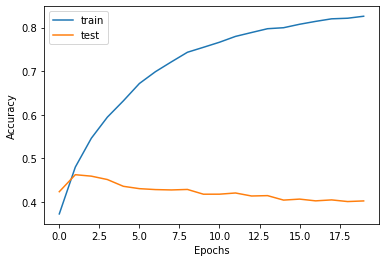

In [ ]:
#Plotting the accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')

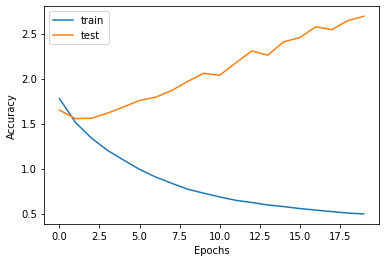

In [ ]:
#Plotting the losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')